In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf



In [20]:
df = pd.read_csv('movie_metadata.csv')


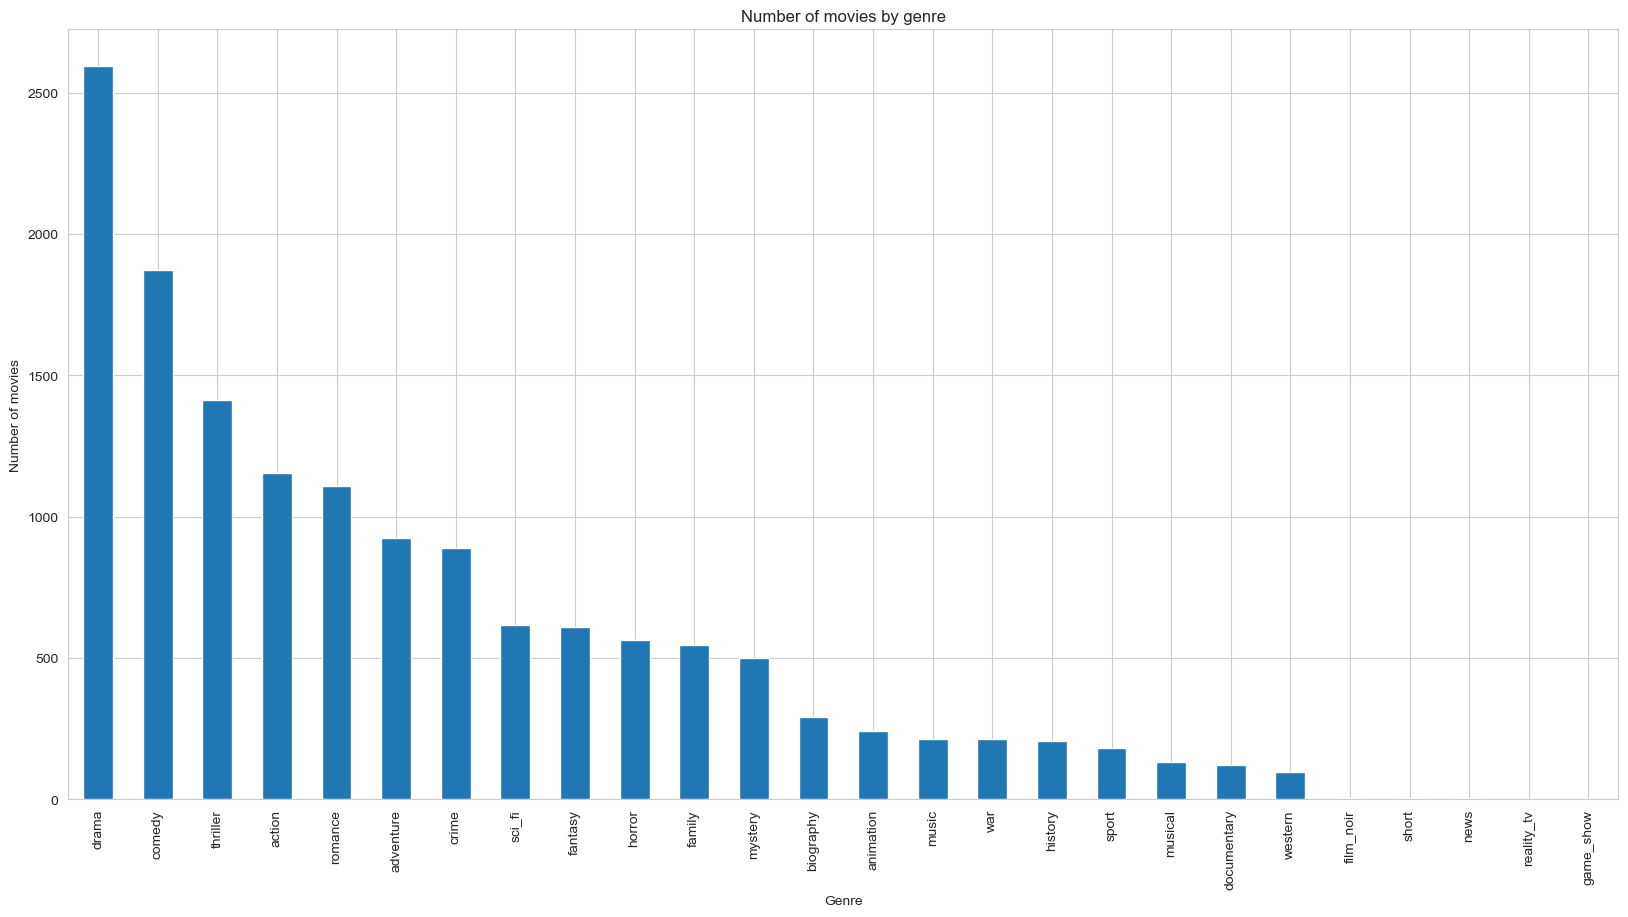

In [21]:
#Plot revenue by genre
df['genres'] = df['genres'].str.split('|')
df = df.explode('genres')
df['genres'] = df['genres'].str.strip()
df['genres'] = df['genres'].str.lower()
df['genres'] = df['genres'].str.replace(' ','_')
df['genres'] = df['genres'].str.replace('-','_')
df['genres'] = df['genres'].str.replace('&','_')

df['genres'].value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Number of movies by genre')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.show()


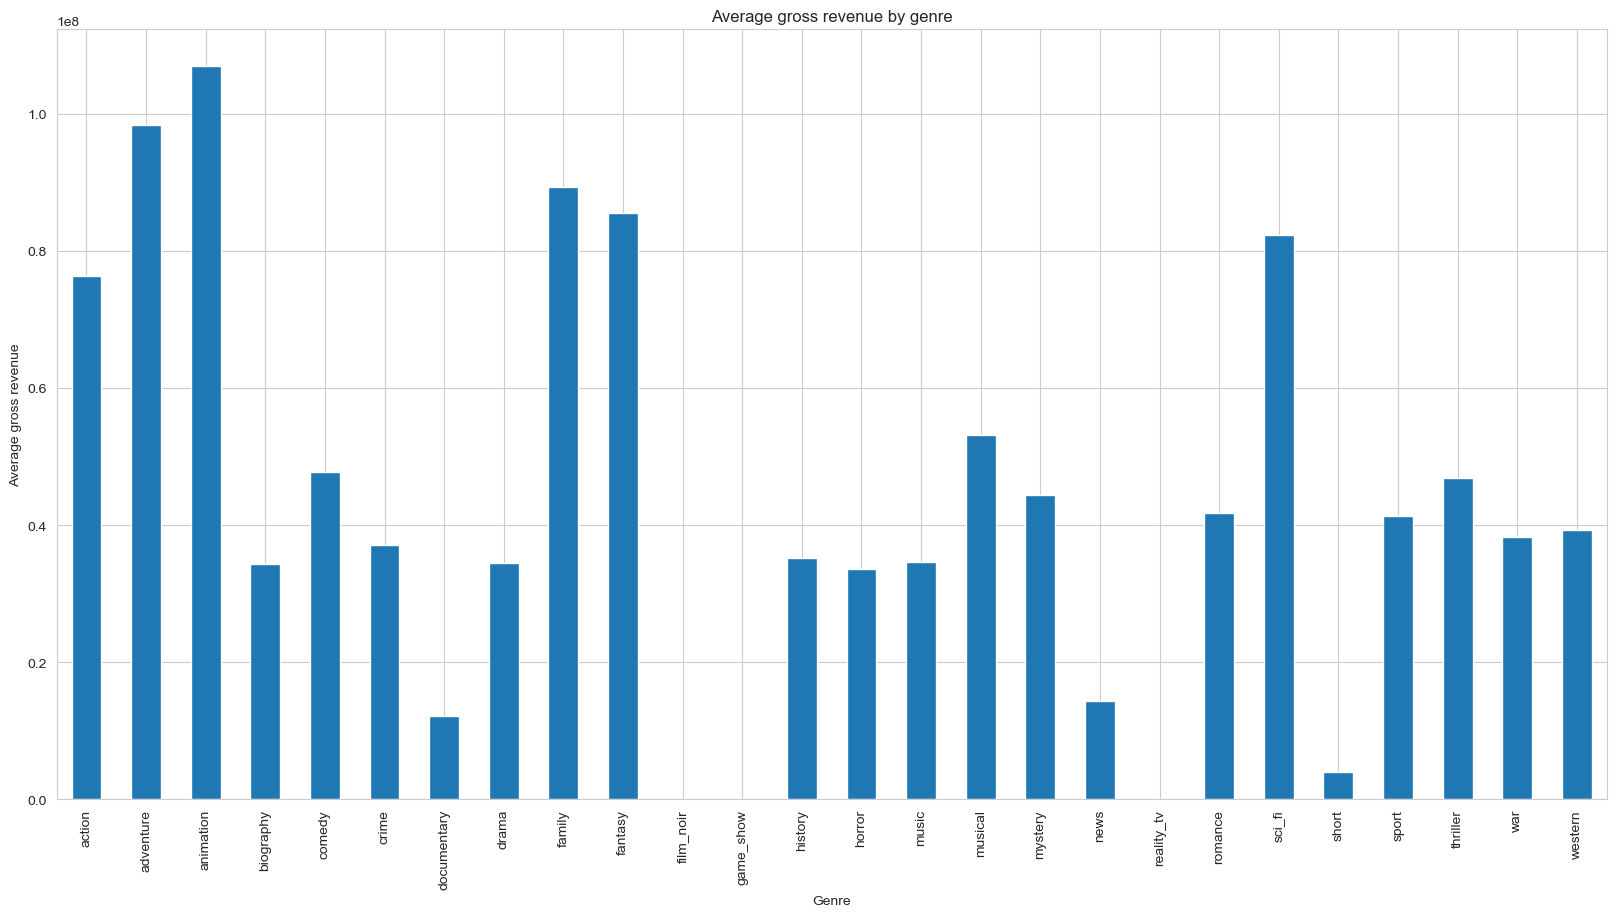

In [22]:
#gross revenue by genre
df.groupby('genres')['gross'].mean().plot(kind='bar', figsize=(20,10))
plt.title('Average gross revenue by genre')
plt.xlabel('Genre')
plt.ylabel('Average gross revenue')
plt.show()


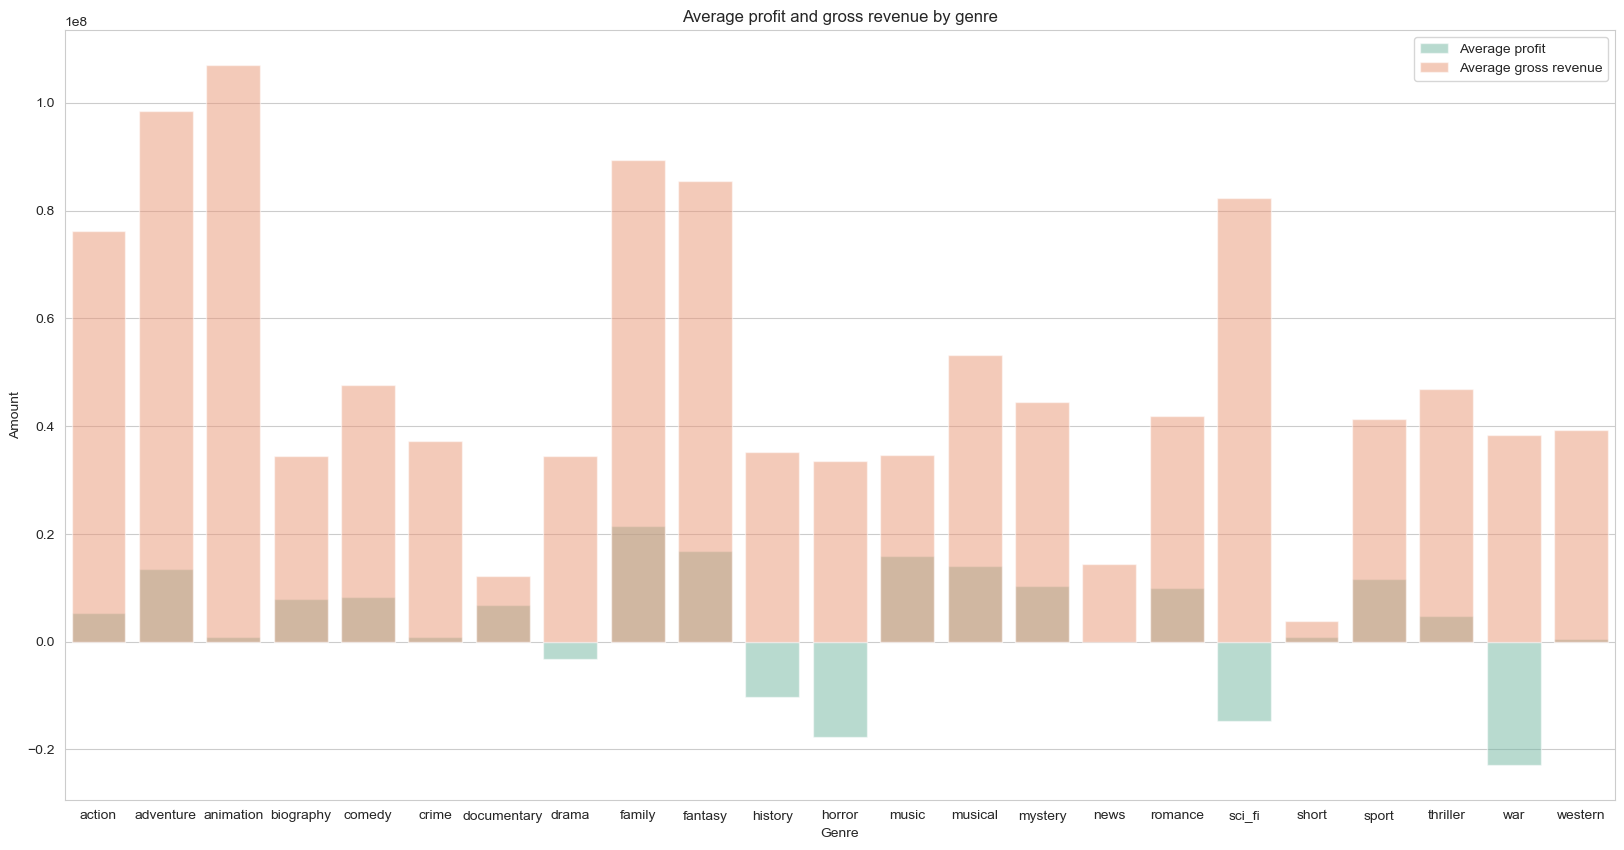

In [23]:
#remove rows having genres with combiend revenue = 0 (film_noir,,game_shwo, reality_tv)

df = df[df['genres'] != 'film_noir']
df = df[df['genres'] != 'game_show']
df = df[df['genres'] != 'reality_tv']

df['profit'] = df['gross'] - df['budget']
profit_by_genre = df.groupby('genres')['profit'].mean()
gross_by_genre = df.groupby('genres')['gross'].mean()

# Define the colors for the bars
colors = sns.color_palette('Set2', n_colors=2)

# Create a barplot of the average profit by genre
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=profit_by_genre.index, y=profit_by_genre.values, color=colors[0], alpha=0.5, label='Average profit', ax=ax)

# Overlay a barplot of the average gross revenue by genre
sns.barplot(x=gross_by_genre.index, y=gross_by_genre.values, color=colors[1], alpha=0.5, label='Average gross revenue', ax=ax)

# Set the title, x-label, and y-label
ax.set_title('Average profit and gross revenue by genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Amount')

# Add a legend
ax.legend(loc='best')

# Show the plot
plt.show()


(array([9.472e+03, 1.692e+03, 6.030e+02, 2.150e+02, 1.280e+02, 5.700e+01,
        1.100e+01, 4.000e+00, 1.200e+01, 4.000e+00]),
 array([1.62000000e+02, 7.60507305e+07, 1.52101299e+08, 2.28151868e+08,
        3.04202436e+08, 3.80253004e+08, 4.56303573e+08, 5.32354142e+08,
        6.08404710e+08, 6.84455278e+08, 7.60505847e+08]),
 <BarContainer object of 10 artists>)

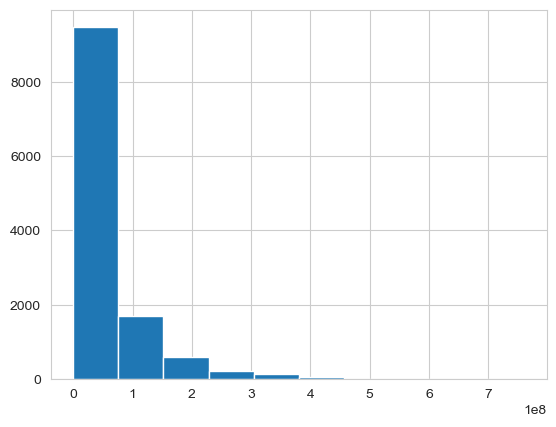

In [24]:
#histogram of gross revenue
plt.hist(df['gross'])

In [25]:
# #log transform the gross revenue
# df['gross'] = np.log(df['gross'])
# #now plot the histogram of the log transformed gross revenue
# plt.hist(df['gross'])

In [26]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

color                          52
director_name                 307
num_critic_for_reviews         94
duration                       34
director_facebook_likes       307
actor_3_facebook_likes         44
actor_2_name                   23
actor_1_facebook_likes         10
gross                        2297
genres                          0
actor_1_name                   10
movie_title                     0
num_voted_users                 0
cast_total_facebook_likes       0
actor_3_name                   44
facenumber_in_poster           31
plot_keywords                 310
movie_imdb_link                 0
num_user_for_reviews           42
language                       31
country                        11
content_rating                707
budget                       1256
title_year                    314
actor_2_facebook_likes         23
imdb_score                      0
aspect_ratio                  728
movie_facebook_likes            0
profit                       2954
dtype: int64


In [27]:
df = df.drop(columns=['color'])
n_original = len(df)
df.dropna(inplace=True)
n_null_removed = len(df)
print("original size, new size: "+ str(n_original)+", " +str(n_null_removed))

original size, new size: 14495, 11237


In [28]:
df.head()


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,action,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,adventure,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,fantasy,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,sci_fi,CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,action,Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0


In [29]:
# create binary variables for each genre
genres_df = df['genres'].str.get_dummies(sep='|')
# merge new dataframe with original dataframe
df = pd.concat([df, genres_df], axis=1)

In [30]:
# Calculate ratio of gross profit to budget
df['gross_budget_ratio'] = df['gross'] / df['budget']

Model 1: Predicting Gross Revenue 

In [31]:
df.columns


Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profit',
       'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'history', 'horror',
       'music', 'musical', 'mystery', 'romance', 'sci_fi', 'sport', 'thriller',
       'war', 'western', 'gross_budget_ratio'],
      dtype='object')

In [39]:
#make traing and test sets to predict gross revenue and profit in varying models

df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profit',
       'action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'history', 'horror',
       'music', 'musical', 'mystery', 'romance', 'sci_fi', 'sport', 'thriller',
       'war', 'western', 'gross_budget_ratio'],
      dtype='object')

<AxesSubplot:>

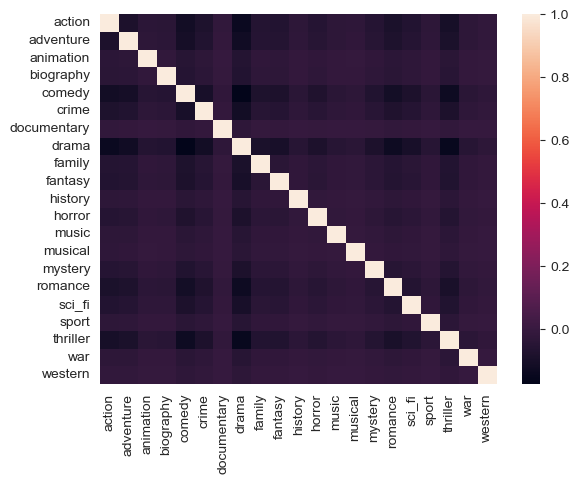

In [33]:
#multicoliniarity
correlation_matrix = df[['action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sci_fi', 'sport', 'thriller', 'war', 'western']].corr()
sns.heatmap(correlation_matrix)

<AxesSubplot:>

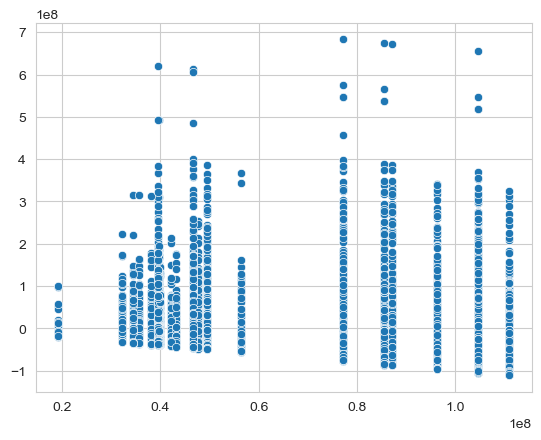

In [34]:
sns.scatterplot(x=model.fittedvalues, y=model.resid)


In [41]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Save the training and testing data as CSV files
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)